In [1]:
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from datetime import timedelta

In [2]:
def map_label_sw(label):
    if (label == 1) or (label == 2) or (label == 3) or (label == 4) or (label == 5):
        return 1
    else:
        return 0

In [3]:
def map_label_ldr(label):
    if (label == 1) or (label == 2):
        return 0
    elif (label == 3) or (label == 4):
        return 1
    elif label == 5:
        return 2
    elif label == 0:
        return 3

In [4]:
def map_label_nr(label):
    if (label == 1) or (label == 2) or (label == 3) or (label == 4):
        return 0
    elif label == 5:
        return 1
    elif label == 0:
        return 2

In [5]:
df_ = pd.read_csv('out.csv')

In [6]:
df_['label'] = df_['label'].apply(lambda x: map_label_sw(x))

In [7]:
x_ = df_.filter(['rpm', 'object_distance', 'movement_fast', 'movement_slow', 'signal_quality'], axis=1)
y_ = df_['label']

In [9]:
# x_r = np.reshape(np.array(scaled), (x_.shape[0], 5, 1))

In [8]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from tensorflow.keras import Input

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x_)

In [11]:
train_data, test_data, train_labels, test_labels = train_test_split(scaled, y_, test_size=0.2, random_state=42)

In [12]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score

forest_reg = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# scores = cross_val_score(forest_reg, train_data, train_labels.values.ravel(), scoring="neg_mean_squared_error", cv=10)
# rdf_scores = np.sqrt(-scores)
# print(rdf_scores)

forest_reg.fit(train_data, train_labels)
rf_predict = forest_reg.predict(test_data)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score #For testing Accuracy
from sklearn.metrics import confusion_matrix

In [14]:
rf_acore = accuracy_score(test_labels, rf_predict)
print('Accuracy = {:.2f} %'.format(rf_acore*100))
# rf_acore #Accuracy For after hiperparameter is changeddisplay_scoresdisplay_scores

Accuracy = 90.56 %


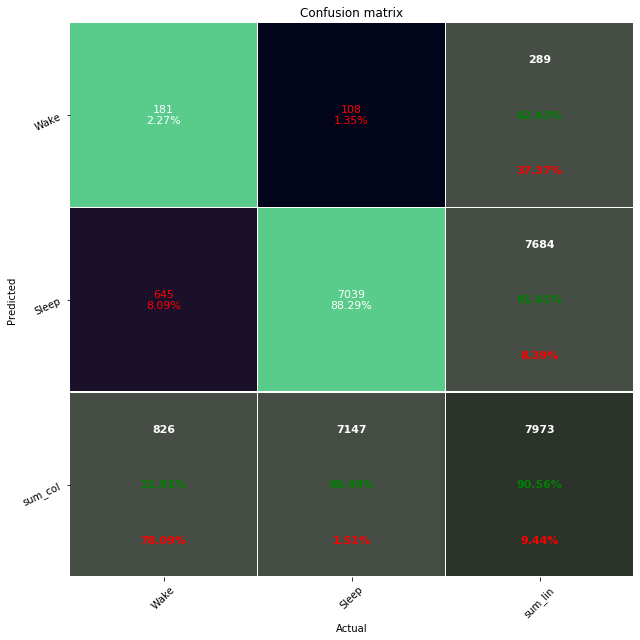

In [15]:
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

predict = rf_predict
plot_confusion_matrix_from_data(test_labels, predict, columns=['Wake', 'Sleep'])

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30, 40, 45, 50, 55], 'max_features': [1, 2, 3, 4, 5]},
{'bootstrap': [False], 'n_estimators': [3, 10, 30, 40, 45, 50], 'max_features': [1, 2, 3, 4, 5]},
]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
scoring='accuracy')
grid_search.fit(train_data, train_labels.values.ravel())
grid_search.best_params_

{'max_features': 4, 'n_estimators': 40}

In [22]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
df_ = pd.read_csv('out.csv')

x_ = df_.filter(['rpm', 'object_distance', 'movement_fast', 'movement_slow', 'signal_quality'], axis=1)
y_ = df_['label']

In [30]:
scaled = scaler.fit_transform(x_)
train_data, test_data, train_labels, test_labels = train_test_split(scaled, y_, test_size=0.2, random_state=42)

In [31]:
# Using only sleep data for classification

data_sleep = test_data[np.where(predict == 1)]
labels_sleep = np.array(test_labels)[np.where(predict == 1)]

train_data_sleep, test_data_sleep, train_labels_sleep, test_labels_sleep = train_test_split(data_sleep, labels_sleep, test_size=0.2, random_state=42)

forest_reg = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# scores = cross_val_score(forest_reg, train_data, train_labels.values.ravel(), scoring="neg_mean_squared_error", cv=10)
# rdf_scores = np.sqrt(-scores)
# print(rdf_scores)

forest_reg.fit(train_data_sleep, train_labels_sleep)
rf_predict = forest_reg.predict(test_data_sleep)

Accuracy = 43.05 %


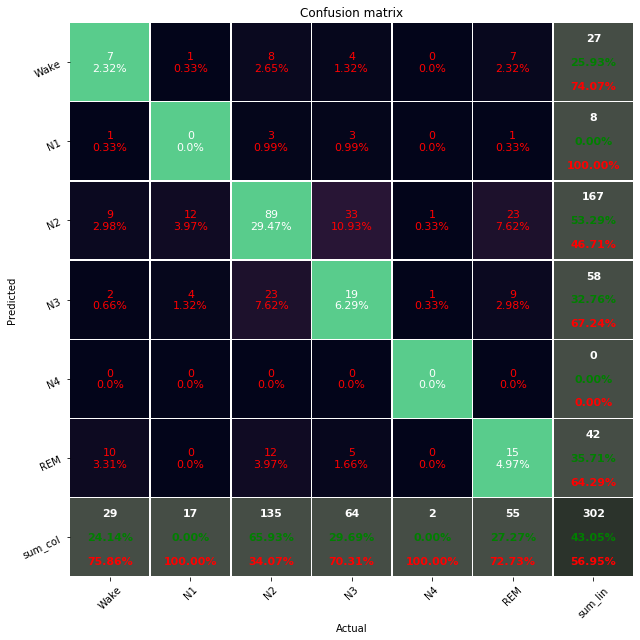

In [32]:
from sklearn.metrics import accuracy_score
rf_acore = accuracy_score(test_labels_sleep, rf_predict)
print('Accuracy = {:.2f} %'.format(rf_acore*100))

from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

predict = rf_predict
plot_confusion_matrix_from_data(test_labels_sleep, predict, columns=['Wake', 'N1', 'N2', 'N3', 'N4', 'REM'])

In [29]:
# Embedding
max_features = 30000
maxlen = 5
embedding_size = 128

# Convolution
kernel_size = 3
filters = 128
pool_size = 2

# LSTM
lstm_output_size = 60

# Training
batch_size = 60
epochs = 10

In [15]:
# model = Sequential()
# # model.add(Embedding(max_features, embedding_size, input_length=maxlen))
# # model.add(Dropout(0.25))
# # model.add(Conv1D(filters,
# #                  kernel_size,
# #                  padding='valid',
# #                  activation='relu',
# #                  strides=2))
# # model.add(MaxPooling1D(pool_size=pool_size))

# model.add(LSTM(units=128,
#                input_shape=train_data[0].shape, return_sequences = True))
# model.add(Dropout(0.25))
# model.add(LSTM(units=128, activation='relu',
#                input_shape=train_data[0].shape))
# # model.add(LSTM(units=256, activation='relu', input_shape=(1,7)))
# # model.add(Dropout(0.25))
# # model.add(LSTM(units=512, activation='relu'))
# model.add(Dense(3, activation='relu'))
# model.add(Activation('softmax'))

In [30]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim = 5))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

W0218 15:47:09.872733 139880070223680 deprecation.py:506] From /home/isuru/.local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
history = model.fit(train_data, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(test_data, test_labels))

Train on 31892 samples, validate on 7973 samples
W0218 15:47:22.999428 139880070223680 deprecation.py:323] From /home/isuru/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
31892/31892 [==============================] - 26s 815us/sample - loss: 1.3716 - acc: 0.4138 - val_loss: 1.3487 - val_acc: 0.4101
Epoch 2/10
31892/31892 [==============================] - 27s 854us/sample - loss: 1.3382 - acc: 0.4142 - val_loss: 1.3371 - val_acc: 0.4101
Epoch 3/10
31892/31892 [==============================] - 27s 843us/sample - loss: 1.3208 - acc: 0.4160 - val_loss: 1.3259 - val_acc: 0.4254
Epoch 4/10
31892/31892 [==============================] - 27s 849us/sample - loss: 1.3094 - acc: 0.4320 - val_loss: 1.3132 - val_acc: 0.4332
Epoch 5/10

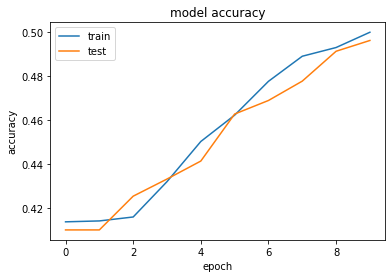

In [33]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

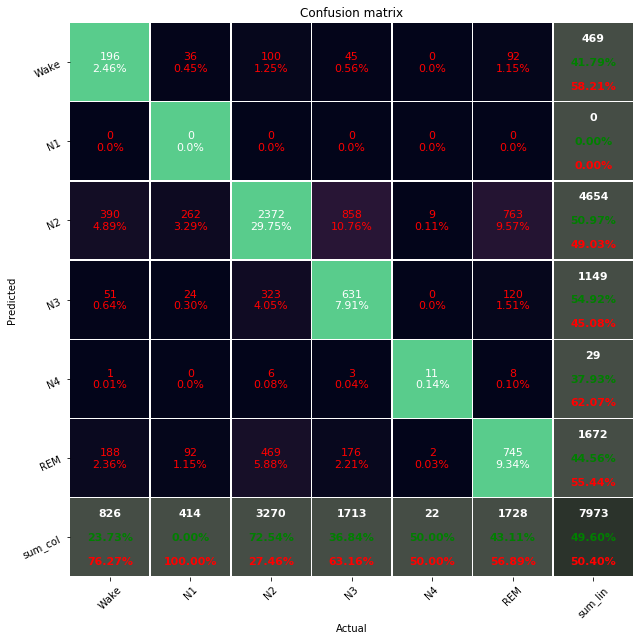

In [34]:
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

predict = model.predict(test_data)
plot_confusion_matrix_from_data(test_labels, predict.argmax(axis=1), columns=['Wake', 'N1', 'N2', 'N3', 'N4', 'REM'])